# Building a Quantum Random Number Generator (QRNG)

Multiple methods are used to build QRNG's in industry and today we will build a primitive one using just one Hadamard Gate, i.e, the [`H Gate`](https://qiskit.org/textbook/ch-states/single-qubit-gates.html#hgate) on a simulator. 

First, let's import what we require from qiskit:

In [2]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

You can ignore the next two lines of code. This will be required when you want to try the QRNG you build on a real device. We'll get to that later. 

In [3]:
# IBMQ.save_account('YOUR_IBM_TOKEN') # you can find your account id on the IBm Quantum Experience website
                                       # in your profile section 

In [4]:
# provider = IBMQ.load_account()

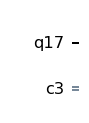

In [24]:
q2 = QuantumRegister(1)
c2 = ClassicalRegister(1)
qc2 = QuantumCircuit(q2, c2)
qc2.draw()

Now apply a hadamard gate to put the first qubit into a $|+\rangle$ state. Where, 
$$ |+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$

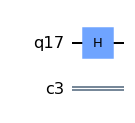

In [25]:
qc2.h(0)
qc2.draw()

We only get results when we measure the qubit and then read that clasical data, which in our case is then store in our classical register `c2`.

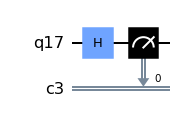

In [26]:
qc2.measure(q2[0], c2[0])
qc2.draw()

In [27]:
# running and getting results 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc2, backend, shots=100)
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
result = job.result()
count = result.get_counts()
print(count)


{'0': 45, '1': 55}


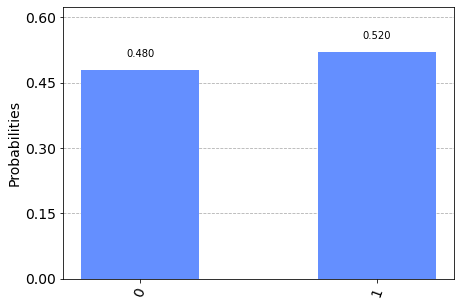

In [22]:
plot_histogram(count)

If we re-run the above cell we randomly get the value `0` and `1`. We've created a random number generator!